In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from sklearn.decomposition import PCA


# %matplotlib widget
%matplotlib inline

## Visualize Robot Movements

In [2]:
train_data_directory = "data/train/"
test_data_directory = "data/test/"

def get_file_path(movement: str, number: int, train: bool = True) -> str:
    if train:
        filepath = os.path.join(train_data_directory, f"{movement}_{number}.npy")
    else: 
        filepath = os.path.join(test_data_directory, f"{movement}_{number}t.npy")
    return filepath

In [3]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.plot(data[:,:,0][:,0], data[:,:,0][:,1], data[:,:,0][:,2], 'o')
# plt.show()


In [4]:
def animate_movement(filepath: str) -> animation.FuncAnimation:
    """Animate the movement of the robot given the file path to the data"""

    data = np.load(filepath)
    data = data.reshape(38,3,100)
    animation.writer = animation.writers['ffmpeg']

    plt.ioff()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # write the update function, specifically including the ax.clear() function this was important.
    def update(i):
        ax.clear()
        ax.plot(data[:,:,i][:,0], data[:,:,i][:,1], data[:,:,i][:,2], 'o-', markersize=2)
        ax.set_title("Robot Movement Visualization")
        ax.set_xlim(-750, 1000)
        ax.set_ylim(-1000, 1000)
        ax.set_zlim(-750, 1000)
        return ax

    ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)

    return ani

In [5]:
# filepath = get_file_path("walking", 1)
# ani = animate_movement(filepath=filepath)
# HTML(ani.to_html5_video())

## Load Data

In [6]:
num_train_samples = 5
num_test_samples = 1

def load_movement_data(train: bool = True) -> tuple[np.array, np.array]:
    """Load all the training or test data into a single numpy array"""
    num_samples = num_train_samples if train else num_test_samples

    data_loaded = []
    labels = []
    movements = ["jumping", "running", "walking"]
    for movement in movements:
        for i in range(1, num_samples + 1):
            filepath = get_file_path(movement, i, train=train)
            data_loaded.append(np.load(filepath).reshape(-1))
            labels.append(movement)

    all_samples = np.vstack(data_loaded)
    labels = np.array(labels)
    return all_samples, labels

movement_data_train, labels = load_movement_data(train=True)

## PCA on Robot Movement Samples

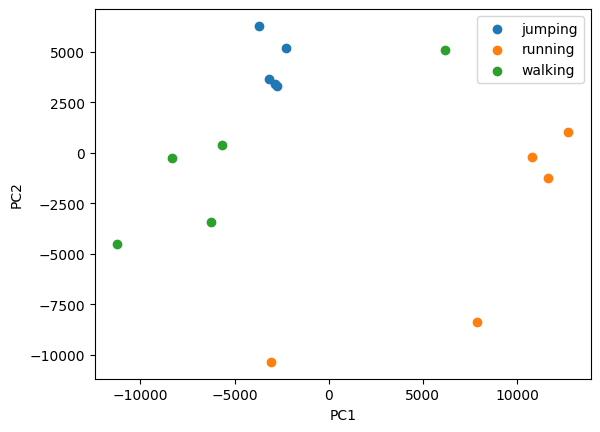

In [7]:
k_components = 2

my_pca_model = PCA(n_components=k_components)
my_pca_model.fit(movement_data_train)

movement_data_train_pca = my_pca_model.transform(movement_data_train)

fig = plt.figure()
ax = fig.add_subplot(111)

for i, label in enumerate(np.unique(labels)):
    ax.scatter(movement_data_train_pca[labels == label, 0], movement_data_train_pca[labels == label, 1], label=label)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.legend()
plt.show()

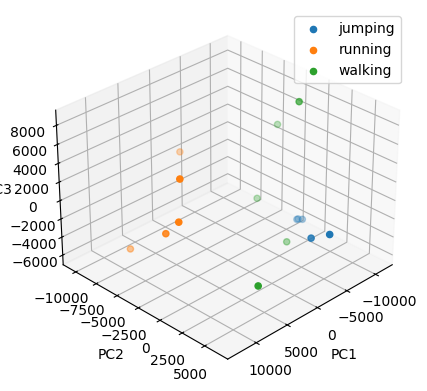

In [8]:
k_components = 3

my_pca_model = PCA(n_components=k_components)

my_pca_model.fit(movement_data_train)

movement_data_train_pca = my_pca_model.transform(movement_data_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(np.unique(labels)):
    ax.scatter(
        movement_data_train_pca[labels == label, 0],
        movement_data_train_pca[labels == label, 1],
        movement_data_train_pca[labels == label, 2],
        label=label
    )

ax.view_init(azim=45)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


plt.legend()
plt.show()

In [9]:
movement_data_test, test_labels = load_movement_data(train=False)
movement_data_test_tranformed = my_pca_model.transform(movement_data_test)

movement_data_test_tranformed

array([[-2920.4330323 ,  3232.34124047,  -642.74254172],
       [ 1518.68771626, -8904.62368645, -6448.06615402],
       [ 5044.45304494,  6428.5635833 , -1481.44351488]])

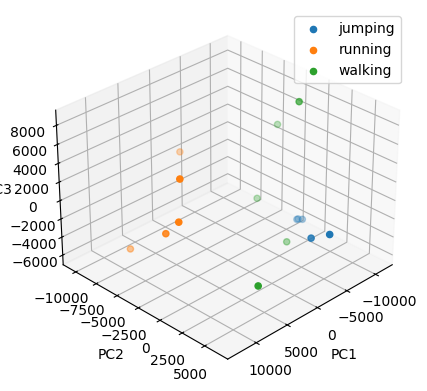

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(np.unique(labels)):
    ax.scatter(
        movement_data_train_pca[labels == label, 0],
        movement_data_train_pca[labels == label, 1],
        movement_data_train_pca[labels == label, 2],
        label=label
    )

ax.view_init(azim=45)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


plt.legend()
plt.show()

In [ ]:
# compute mean of each label after performing PCA
# reclassify each point based on min distance from mean of each label
# compute accuracy

from sklearn.base import BaseEstimator, ClassifierMixin

class CustomDistanceClassifier(ClassifierMixin, BaseEstimator):
    def __init__() -> None:
        pass

    def fit(self, X: np.array, y: np.array) -> "CustomDistanceClassifier":
        """Compute the means of each label."""
        self.labels = np.unique(y)
        self.means = np.array(
                [
                    X[y == label].mean(axis=0)
                    for label in self.labels
                ]
            )
        return self
    
    def predict(self, X):
        distances = np.array([np.linalg.norm(X - mean, axis=1) for mean in self.means])
        return self.labels[np.argmin(distances, axis=0)]